# I. First step : Simple Convolutionnal Neural Network (CNN)

## On MNIST

### Import the library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor

### Collecting the data

In [2]:
from torchvision import transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transform,
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transform
)

In [3]:
print("shape of train data : " , train_data.data.size())
print("shape of test data : " , test_data.data.size())
print("shape of train labels : " , train_data.targets.size())

shape of train data :  torch.Size([60000, 28, 28])
shape of test data :  torch.Size([10000, 28, 28])
shape of train labels :  torch.Size([60000])


### Preprocessing

In [4]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size=128,
                         shuffle=True,
                         num_workers=1),

    'test'  : DataLoader(test_data,
                         batch_size=128,
                         shuffle=True,
                         num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1281efdf0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1281ef370>}

tensor(5)


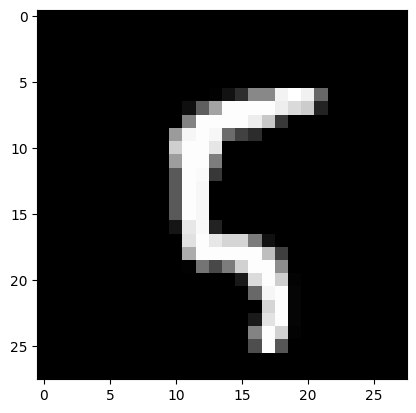

In [5]:
plt.imshow(train_data.data[100],cmap='gray')
print(train_data.targets[100])

### Building the network

In [6]:
import torch.nn as nn
from torch.nn import Sequential,Conv2d,AvgPool2d,Flatten,Linear,Sigmoid

In [7]:
nb_epoch = 20

#Define the model Sequential

model = Sequential(
    Conv2d(in_channels = 1,out_channels = 6,kernel_size = (5,5),padding = 2),
    Sigmoid(),
    AvgPool2d(kernel_size = (2,2),stride = 2),
    Conv2d(in_channels = 6,out_channels = 16,kernel_size = (5,5)),
    Sigmoid(),
    AvgPool2d(kernel_size = (2,2),stride = 2),
    Flatten(),
    Linear(16*5*5,120),
    Sigmoid(),
    Linear(120,84),
    Sigmoid(),
    Linear(84,10)
)

In [37]:
from torchvision import models
from torchsummary import summary
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=9, bias=True)
)


In [9]:
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
           Sigmoid-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
           Sigmoid-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
           Flatten-7                  [-1, 400]               0
            Linear-8                  [-1, 120]          48,120
           Sigmoid-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
          Sigmoid-11                   [-1, 84]               0
           Linear-12                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [10]:
import torch.optim as optim

#Define Loss function and Optimizer :
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [11]:
num_epochs = 20

#Train the model:

def train(num_epochs, cnn, loaders):
    loss_value = np.zeros((20,2))
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(loaders['train'], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 100 == 0:    # print every 100 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
        loss_value[epoch] = [epoch,loss.item()]
    print('Finished Training')
    return loss_value
loss_value  = train(nb_epoch,model, loaders)

torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])
torch.Size([128, 10])
torch.Size([128])


In [12]:
#Test the model:

def test(cnn,loaders):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = cnn(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(labels.size(0))
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')
test(model,loaders)

128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
16
Accuracy of the network on the 10000 test images: 98.24 %


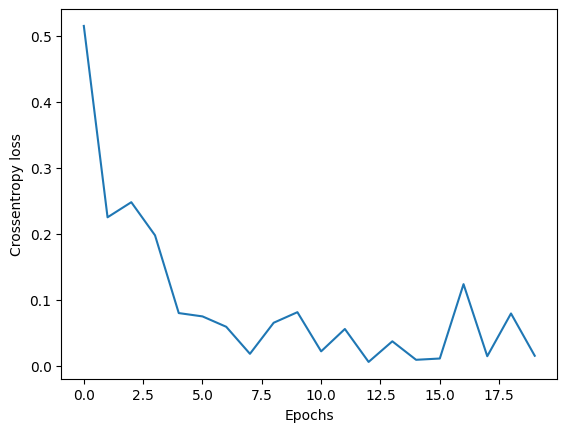

In [13]:
#Plot the loss
plt.plot(loss_value[:,0],loss_value[:,1])
plt.xlabel("Epochs")
plt.ylabel("Crossentropy loss")
plt.show()

# II. Second step: Simple Convolutionnal Neural Network on more complex data.

### Load the data

In [14]:
from torch.utils.data import TensorDataset

xTrain=np.load('./pathmnist/train_images.npy')
xTest=np.load('./pathmnist/test_images.npy')
yTrain=np.load('./pathmnist/train_labels.npy')
yTest=np.load('./pathmnist/test_labels.npy')

xTrain = torch.Tensor(xTrain)# transform to torch tensor
yTrain = torch.LongTensor(yTrain)
xTest = torch.Tensor(xTest)
yTest = torch.LongTensor(yTest)

#Change the size (:,28,28,3) to (:,3,28,28)
xTrain = xTrain.permute(0, 3, 1, 2)
xTest = xTest.permute(0, 3, 1, 2)

train_dataset = TensorDataset(xTrain,yTrain) # create your datset
test_dataset = TensorDataset(xTest,yTest)

loaders = {
    'train' : DataLoader(train_dataset,
                         batch_size=64,
                         shuffle=100,
                         num_workers=1),

    'test'  : DataLoader(test_dataset,
                         batch_size=64,
                         shuffle=100,
                         num_workers=1),
}
loaders
print(loaders['train'])

### Building the network

In [15]:
from torch import sigmoid,flatten

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(in_channels = 3,out_channels = 6,kernel_size = (5,5),padding = 2)
        self.pool = AvgPool2d(kernel_size = (2,2),stride = 2)
        self.conv2 = Conv2d(in_channels = 6,out_channels = 16,kernel_size = (5,5))
        self.fc1 = Linear(16 * 5 * 5, 120)
        self.fc2 = Linear(120, 84)
        self.fc3 = Linear(84, 9)

    def forward(self, x):
        x = self.pool(sigmoid(self.conv1(x)))
        x = self.pool(sigmoid(self.conv2(x)))
        x = flatten(x,1) # flatten all dimensions except batch
        x = sigmoid(self.fc1(x))
        x = sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

model = Net()

In [16]:
print(model)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=9, bias=True)
)


In [17]:
summary(model,(3,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             456
         AvgPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         AvgPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                    [-1, 9]             765
Total params: 61,921
Trainable params: 61,921
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.31
----------------------------------------------------------------


In [18]:
def train(num_epochs, cnn, loaders):
    loss_value = np.zeros((20,2))
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(loaders['train'], 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = cnn(inputs)
            loss = criterion(outputs, labels[:,0]) #To have label in good size
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if (i+1) % 100 == 0:    # print every 100 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
        loss_value[epoch] = [epoch,loss.item()]
    print('Finished Training')
    return loss_value

loss_value  = train(nb_epoch,model,loaders)

[1,   100] loss: 2.216
[1,   200] loss: 2.216
[1,   300] loss: 2.210
[1,   400] loss: 2.215
[1,   500] loss: 2.214
[1,   600] loss: 2.220
[1,   700] loss: 2.215
[1,   800] loss: 2.215
[1,   900] loss: 2.213
[1,  1000] loss: 2.214
[1,  1100] loss: 2.215
[1,  1200] loss: 2.219
[1,  1300] loss: 2.222
[1,  1400] loss: 2.221
[2,   100] loss: 2.215
[2,   200] loss: 2.215
[2,   300] loss: 2.213


KeyboardInterrupt: 

In [ ]:
def test(cnn,loaders):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in loaders['test']:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = cnn(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            print(labels.size(0))
            print((predicted == labels).sum().item())
            correct += (predicted == labels).sum().item()
    print(correct)
    print(total)
    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

test(model,loaders)

In [ ]:
#Plot the loss
plt.plot(loss_value[:,0],loss_value[:,1])
plt.xlabel("Epochs")
plt.ylabel("Crossentropy loss")
plt.show()

# Third step : Transfer learning

## Load the data

In [28]:
import glob
from tqdm import tqdm
from torchvision.models import vgg16
from PIL import Image
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder

In [34]:
classes = ['mucca', 'elefante', 'gatto', 'cavallo', 'scoiattolo', 'ragno', 'pecora', 'farfalla', 'gallina', 'cane']
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


dataset = ImageFolder(root='./animal-10/raw-img/train', transform=transform)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


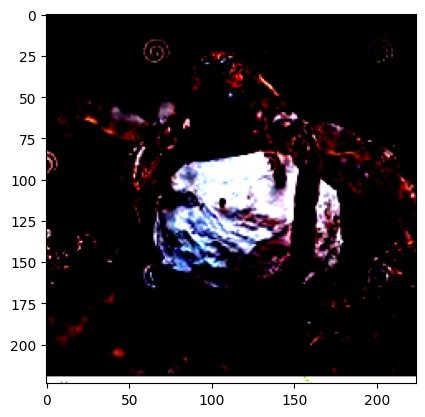

In [30]:
# get a batch of images from the dataloader
images, labels = next(iter(dataloader))
# plot the first image in the batch
plt.imshow(images[0].permute(1, 2, 0))
plt.show()

In [31]:
# Load train data
from torch.utils.data import SubsetRandomSampler

# get the indices of the images in the three classes we want
class_indices = []
for class_label in tqdm(['mucca', 'elefante', 'gatto']):
    indices = [i for i, (image, label) in enumerate(dataset) if label == class_label]
    # shuffle the indices to get a random subset
    indices = torch.randperm(len(indices))[:200]
    class_indices.append(indices)

# concatenate the indices of the selected images
indices = torch.cat(class_indices)

# create a sampler with the selected indices
sampler = SubsetRandomSampler(indices)

# create a dataloader for the subset
train = torch.utils.data.DataLoader(dataset, sampler=sampler, batch_size=32)

100%|██████████| 3/3 [02:25<00:00, 48.44s/it]


In [32]:
#Load test data

dataset = ImageFolder(root='./animal-10/raw-img/test', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

## Define the model

In [67]:
from torch.nn import Softmax,AdaptiveAvgPool2d

vgg_model = models.vgg16(pretrained=True)

# Modify the classifier of the VGG16 model
num_features = vgg_model.classifier[-1].in_features
# Define a custom classifier to be added to the model
classifier = Sequential(
    AdaptiveAvgPool2d((1, 1)),
    Flatten(),
    Linear(512, 1024),
    Sigmoid(),
    Linear(1024, 10),
    Softmax(dim=1)
)

# Replace the VGG16 classifier with the custom classifier
vgg_model.classifier = classifier


/Users/thibaut/Desktop/DeepLearning/Lab4/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/thibaut/Desktop/DeepLearning/Lab4/venv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [68]:
print(vgg_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [69]:
summary(vgg_model, input_size=(3, 224, 224))

ValueError: Input dimension should be at least 3